### Введение

Данный набор данных собран мной в рамках пилотного исследования для магистерской диссертации. В рамках исследования уже проведен теоретический обзор, на основе теоретического обзора отобраны исследуемые конструкты и операционализирована анкета, после чего проведен пилотный сбор данных (N=172). Здесь будут представлены результаты пилотного эмпирического исследования и анализ анкеты. Часть переменных перекодированы в числа, часть намеренно сохранены в текстовом виде для создания категориальных переменных. Предварительно анкета закодирована для удобства работы, декодировка анкеты представлена в Приложении внизу.

#### В данной работе не будут рассмотрены следующие не релевантные для формата исследования операции:
1. Z оценка и выбросы.
2. Стандартизация переменных (используется 5-балльная шкала Лайкерта).
3. Работа с пропусками данных, так как в датасете для диссертации отсутствуют пропуски

Создание переменных предусмотрено на следующем этапе (факторный анализ)


### 0. Мем для разогрева
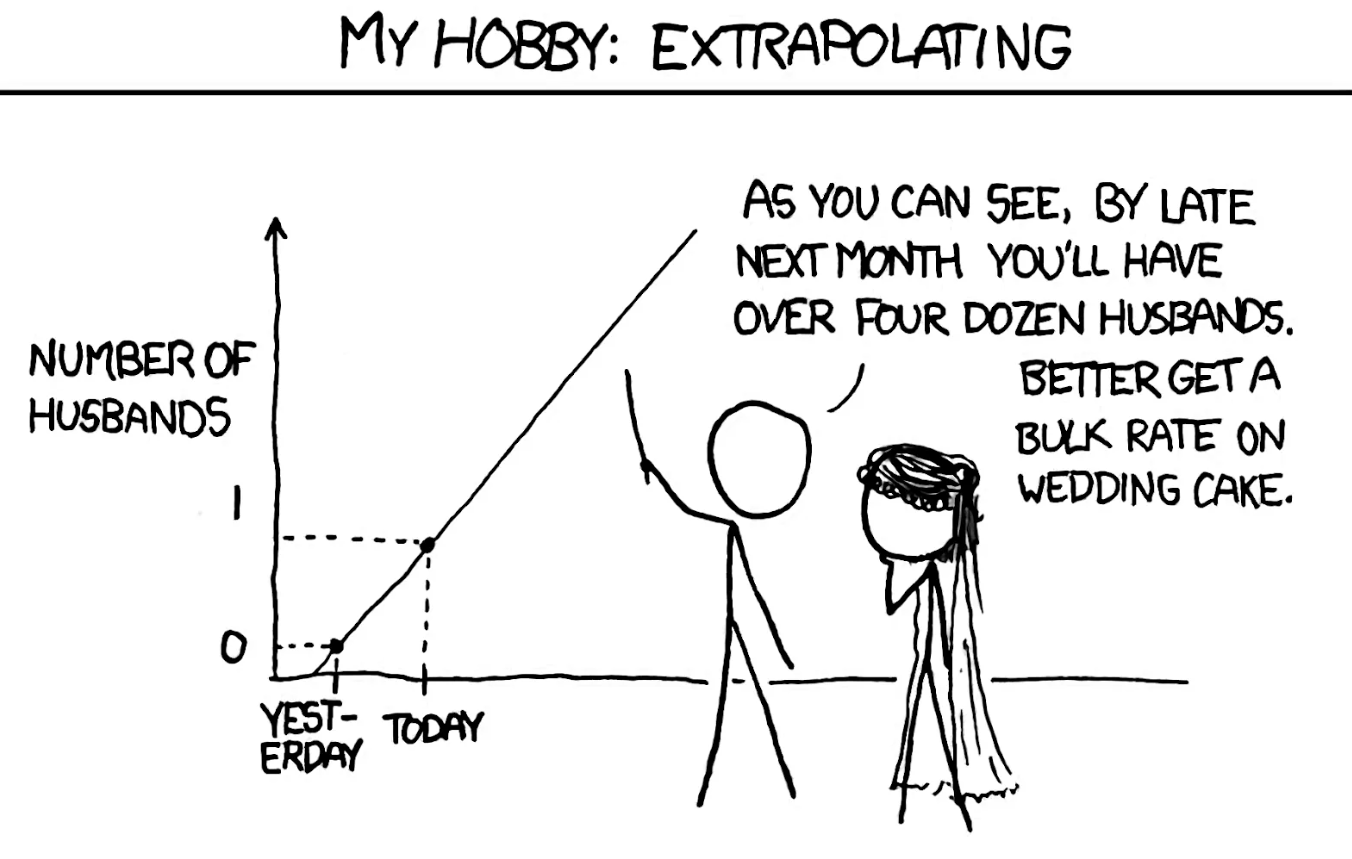

### 1. Подготовка и осмотр датасета

На данном этапе подготовим необходимые пакеты и загрузим датасет, ознакомимся с количеством столбцов и т.д.

In [1]:
#загрузим библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) #покажем все колонки

In [2]:
#загрузим файл

df=pd.read_excel('172resp.xlsx')

In [3]:
#изучим размеры датасета

df.shape

(172, 139)

In [4]:
#посмотрим датасет

df.head(3)

,time,Q1,Q2,Q3,Q4,Q5_1,Q5_2,Q5_3,Q6_1,Q6_2,Q6_3,Q7_1,Q7_2,Q7_3,Q7_4,Q8_1,Q8_2,Q8_3,Q8_4,Q9_1,Q9_2,Q9_3,Q9_4,Q10_1,Q10_2,Q10_3,Q10_4,Q10_5,Q10_6,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q13,Q14_1,Q14_2,Q14_3,Q15_1,Q15_2,Q15_3,Q15_4,Q16_1,Q16_2,Q16_3,Q16_4,Q16_5,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q18_1,Q18_2,Q18_3,Q18_4,Q19_1,Q19_2,Q19_3,Q19_4,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q22_1,Q22_2,Q22_3,Q22_4,Q23_1,Q23_2,Q23_3,Q24_1,Q24_2,Q24_3,Q24_4,Q24_5,Q25_1,Q25_2,Q25_3,Q25_4,Q26_1,Q26_2,Q26_3,Q27_1,Q27_2,Q27_3,Q28_1,Q28_2,Q29_1,Q29_2,Q29_3,Q29_4,Q29_5,Q29_6,Q29_7,Q29_8,Q29_9,Q29_10,Q29_11,Q29_12,Q29_13,Q29_14,Q29_15,Q29_16,Q29_17,Q29_18,Q29_19,Q29_20,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37
0,2022-09-03 17:28:18.339,Часто,Смартфон,"Для общения, Для образования, расширения круго...",Скорее доверяю,2,4,3,4,4,5,2,1,1,2,1,4,4,4,4,4,4,4,4,4,4,5,5,4,4,5,4,4,4,4,4,4,3,2,3,4,4,4,4,Сервис доставки еды,4,3,5,2,1,1,2,3,2,4,4,4,4,4,3,3,4,4,4,2,2,2,3,4,4,5,5,5,5,5,4,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,5,4,5,4,3,2,4,2,2,2,2,5,5,5,1,5,1,1,5,5,1,5,5,2,5,2,5,2,5,5,2,мужской,18-25,Высшее образование,Покупка большинства товаров длительного пользо...,Холост (не замужем),Нет,Больше 1 млн.,г. Москва
1,2022-09-03 18:31:53.127,Часто,Смартфон,"Для образования, расширения кругозора, развити...",Не имею определенного отношения,2,2,3,3,4,5,2,2,2,3,1,3,4,2,3,4,3,4,4,3,4,4,4,4,4,4,2,3,3,2,3,3,3,4,4,4,4,2,2,Стриминговый сервис,4,3,4,2,3,2,3,2,3,3,5,4,2,2,3,3,3,3,2,3,2,2,3,3,2,3,2,3,3,3,3,2,2,2,3,2,3,4,3,3,4,4,2,4,4,2,4,4,4,4,3,2,3,2,4,4,3,4,1,2,3,4,2,3,3,2,2,3,3,2,4,2,2,2,3,2,4,4,2,3,2,2,2,4,2,2,женский,18-25,Высшее образование,Покупка большинства товаров длительного пользо...,Холост (не замужем),Нет,100-500 тыс.,г. Химки
2,2022-09-03 19:18:01.035,Часто,Персональный компьютер / ноутбук,"Для общения, Для образования, расширения круго...",Скорее доверяю,3,3,3,3,4,4,2,1,1,3,3,4,5,3,3,3,3,3,4,4,4,4,4,5,5,5,4,4,5,5,3,3,3,3,4,4,4,4,2,Интернет-магазин,4,3,4,2,1,1,2,1,1,3,3,3,3,3,3,4,4,4,4,1,1,1,4,4,3,4,4,4,4,4,4,4,4,4,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,3,5,3,3,3,4,4,3,3,3,5,5,4,4,3,2,2,3,3,2,3,3,4,3,1,4,3,4,4,3,женский,18-25,Высшее образование,Денег достаточно для приобретения необходимых ...,Холост (не замужем),Нет,Больше 1 млн.,г. Москва


### 2. Описание выборки и демография

Как видно, датасет включает ответы 172 респондента и 139 столбцов ответов. В целом, весьма большой датасет, но нам нет необходимости анализировать все переменные, для этого мы выберем только те, которые необходимы для анализа. Переменные отобраны в соответствии с проведенным ранее теоретическим обзором. Для оценки факторов, формирующих доверие потребителей к онлайн-сервисам, в анкете  использована 5-балльная шкала Лайкерта, где 1 соответствует значению «не согласен», 2 – «скорее не согласен», 3 – «нейтральная позиция», 4 – «скорее согласен», 5 – «согласен». Финальная анкета размещена на платформе «Google Формы». Сбор данных проходил в период с 3 сентября по 16 сентября в рамках тестирования анкеты. Основным методом сбора данных выступил стандартизированный онлайн-опрос, при проведении опроса для распространения анкеты использован метод снежного кома.

In [5]:
#для иизучения демографии удобнее переписать названия столбцов, перепишем

df = df.rename(columns={'Q30': 'Gender', 'Q31': 'Age', 'Q32': 'Education','Q33': 'Income','Q34': 'Marital',
                        'Q35': 'Children','Q36': 'City size','Q37': 'City',})

In [6]:
df.head(3)

,time,Q1,Q2,Q3,Q4,Q5_1,Q5_2,Q5_3,Q6_1,Q6_2,Q6_3,Q7_1,Q7_2,Q7_3,Q7_4,Q8_1,Q8_2,Q8_3,Q8_4,Q9_1,Q9_2,Q9_3,Q9_4,Q10_1,Q10_2,Q10_3,Q10_4,Q10_5,Q10_6,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q13,Q14_1,Q14_2,Q14_3,Q15_1,Q15_2,Q15_3,Q15_4,Q16_1,Q16_2,Q16_3,Q16_4,Q16_5,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q18_1,Q18_2,Q18_3,Q18_4,Q19_1,Q19_2,Q19_3,Q19_4,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q22_1,Q22_2,Q22_3,Q22_4,Q23_1,Q23_2,Q23_3,Q24_1,Q24_2,Q24_3,Q24_4,Q24_5,Q25_1,Q25_2,Q25_3,Q25_4,Q26_1,Q26_2,Q26_3,Q27_1,Q27_2,Q27_3,Q28_1,Q28_2,Q29_1,Q29_2,Q29_3,Q29_4,Q29_5,Q29_6,Q29_7,Q29_8,Q29_9,Q29_10,Q29_11,Q29_12,Q29_13,Q29_14,Q29_15,Q29_16,Q29_17,Q29_18,Q29_19,Q29_20,Gender,Age,Education,Income,Marital,Children,City size,City
0,2022-09-03 17:28:18.339,Часто,Смартфон,"Для общения, Для образования, расширения круго...",Скорее доверяю,2,4,3,4,4,5,2,1,1,2,1,4,4,4,4,4,4,4,4,4,4,5,5,4,4,5,4,4,4,4,4,4,3,2,3,4,4,4,4,Сервис доставки еды,4,3,5,2,1,1,2,3,2,4,4,4,4,4,3,3,4,4,4,2,2,2,3,4,4,5,5,5,5,5,4,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,5,4,5,4,3,2,4,2,2,2,2,5,5,5,1,5,1,1,5,5,1,5,5,2,5,2,5,2,5,5,2,мужской,18-25,Высшее образование,Покупка большинства товаров длительного пользо...,Холост (не замужем),Нет,Больше 1 млн.,г. Москва
1,2022-09-03 18:31:53.127,Часто,Смартфон,"Для образования, расширения кругозора, развити...",Не имею определенного отношения,2,2,3,3,4,5,2,2,2,3,1,3,4,2,3,4,3,4,4,3,4,4,4,4,4,4,2,3,3,2,3,3,3,4,4,4,4,2,2,Стриминговый сервис,4,3,4,2,3,2,3,2,3,3,5,4,2,2,3,3,3,3,2,3,2,2,3,3,2,3,2,3,3,3,3,2,2,2,3,2,3,4,3,3,4,4,2,4,4,2,4,4,4,4,3,2,3,2,4,4,3,4,1,2,3,4,2,3,3,2,2,3,3,2,4,2,2,2,3,2,4,4,2,3,2,2,2,4,2,2,женский,18-25,Высшее образование,Покупка большинства товаров длительного пользо...,Холост (не замужем),Нет,100-500 тыс.,г. Химки
2,2022-09-03 19:18:01.035,Часто,Персональный компьютер / ноутбук,"Для общения, Для образования, расширения круго...",Скорее доверяю,3,3,3,3,4,4,2,1,1,3,3,4,5,3,3,3,3,3,4,4,4,4,4,5,5,5,4,4,5,5,3,3,3,3,4,4,4,4,2,Интернет-магазин,4,3,4,2,1,1,2,1,1,3,3,3,3,3,3,4,4,4,4,1,1,1,4,4,3,4,4,4,4,4,4,4,4,4,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,3,5,3,3,3,4,4,3,3,3,5,5,4,4,3,2,2,3,3,2,3,3,4,3,1,4,3,4,4,3,женский,18-25,Высшее образование,Денег достаточно для приобретения необходимых ...,Холост (не замужем),Нет,Больше 1 млн.,г. Москва




Теперь давайте посмотрим на распределение переменных по разным параметрам. Для этого сначала мы посчитаем уникальные значения по всем переменным

In [7]:
gendistr = df['Gender'].value_counts()
gendistr

женский    113
мужской     59
Name: Gender, dtype: int64

In [8]:
agedistr = df['Age'].value_counts()
agedistr

18-25        135
26-30         17
До 18          6
31-35          5
36-40          4
41-50          2
Старше 60      2
51- 60         1
Name: Age, dtype: int64

In [9]:
edudistr = df['Education'].value_counts()
edudistr

Высшее образование                               113
Незаконченное высшее образование                  34
Два и более высших                                 9
Среднее специальное образование                    6
Неполное среднее образование                       5
Среднее общее образование                          4
Наличие ученой степени кандидата/доктора наук      1
Name: Education, dtype: int64

In [10]:
incdistr = df['Income'].value_counts()
incdistr

Денег достаточно для приобретения необходимых продуктов и одежды, на более крупные покупки приходится откладывать                            66
Покупка большинства товаров длительного пользования (холодильник, телевизор) не вызывает трудностей, однако купить автомобиль мы не можем    60
Мы можем позволить себе купить автомобиль, однако купить квартиру мы не можем                                                                32
Денег достаточно, чтобы вообще ни в чем себе не отказывать                                                                                    6
Денег хватает только на приобретение продуктов питания                                                                                        5
Денег не хватает даже на приобретение продуктов питания                                                                                       3
Name: Income, dtype: int64

In [11]:
mardistr = df['Marital'].value_counts()
mardistr

Холост (не замужем)                               113
Живем вместе, но официально не состоим в браке     27
Женат (замужем)                                    25
Затрудняюсь ответить                                5
Разведен (разведена)                                1
Живем порознь, но не разведены                      1
Name: Marital, dtype: int64

In [12]:
chilistr = df['Children'].value_counts()
chilistr

Нет    158
Да      14
Name: Children, dtype: int64

Text(0.5, 1.0, 'Распределение респондентов по наличию детей')

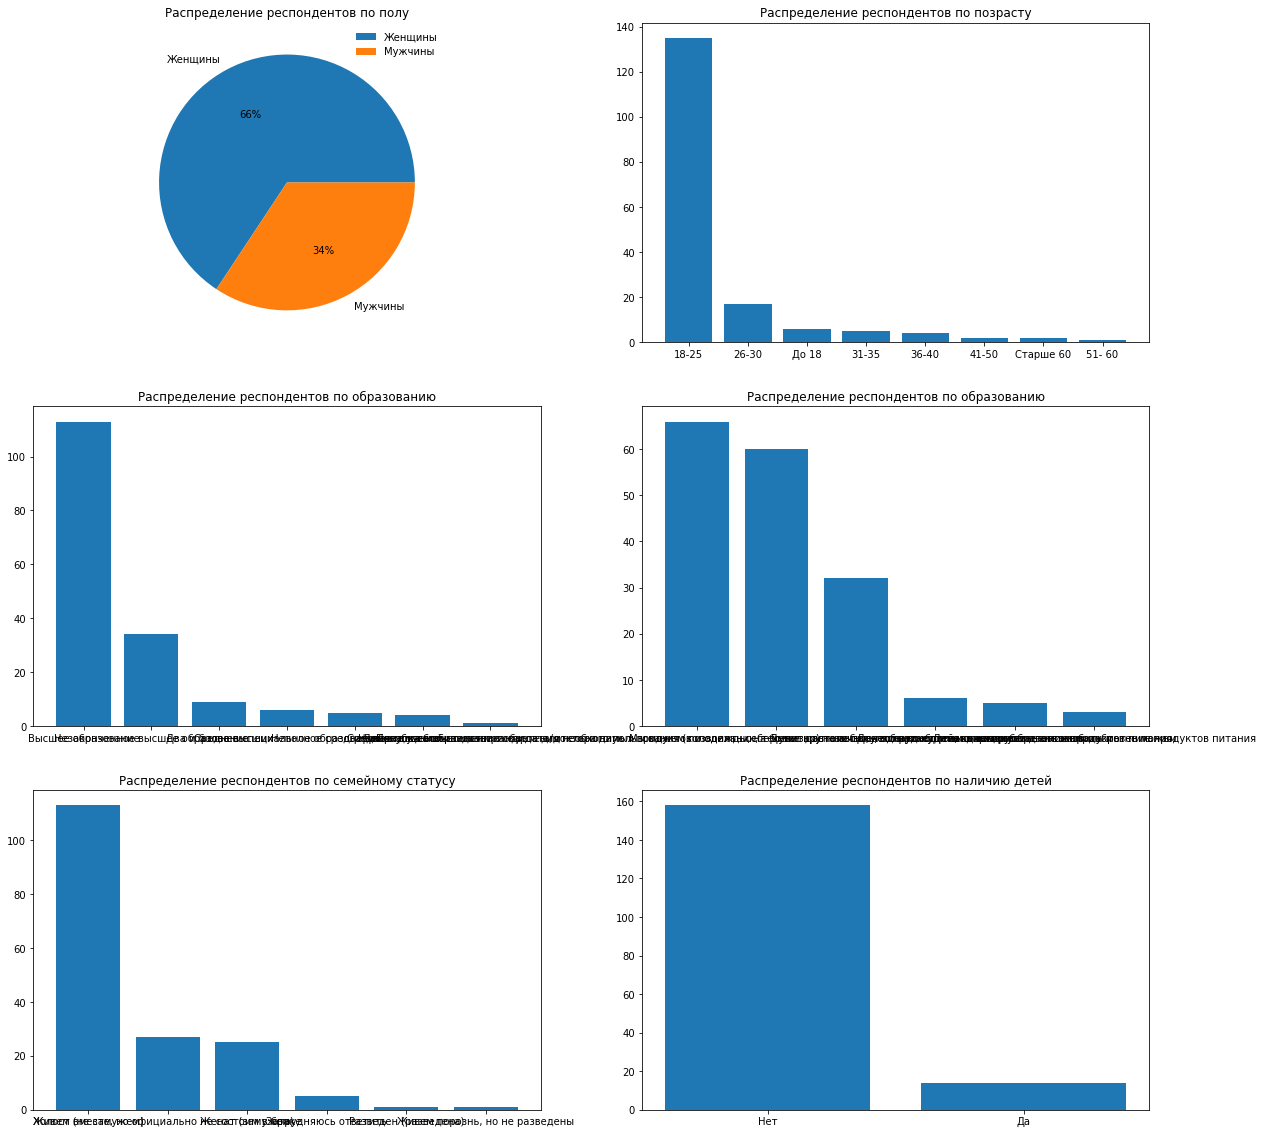

In [13]:
#перейдем к построению графиков, я решил построить 6 штук в одном блоке для наглядности

fig, ax = plt.subplots(3,2, figsize=(20,20))

#Посмотрим распределение респондентов по полу
ax[0][0].pie(gendistr, labels = ['Женщины', 'Мужчины'], autopct='%.0f%%')
ax[0][0].legend(frameon=False)
ax[0][0].set_title('Распределение респондентов по полу')

#Посмотрим распределение респондентов по возрасту
ax[0][1].bar(agedistr.index, agedistr)
ax[0][1].set_title('Распределение респондентов по позрасту')

#Посмотрим распределение респондентов по образованию
ax[1][0].bar(edudistr.index, edudistr)
ax[1][0].set_title('Распределение респондентов по образованию')

#Посмотрим распределение респондентов по доходу
ax[1][1].bar(incdistr.index, incdistr)
ax[1][1].set_title('Распределение респондентов по образованию')

#Посмотрим распределение респондентов по доходу
ax[2][0].bar(mardistr.index, mardistr)
ax[2][0].set_title('Распределение респондентов по семейному статусу')

#Посмотрим распределение респондентов по наличию детей
ax[2][1].bar(chilistr.index, chilistr)
ax[2][1].set_title('Распределение респондентов по наличию детей')

#### Как видно из распределения, выборка является смещенной, но так как целью исследования является анализ поведения молодого поколенияб в целом распределение по возрасту соответвствует целям. Выборка в разрезе пола, семеного статуса, дохода и иных характеристик является смещенной. Так как преимущественно планируется работа с молодым поколением (18-30 лет), то принято решение соответствующим образом отфильтровать выборку.

In [14]:
df_y  = df[((df['Age'] == '18-25') | (df['Age'] == '26-30'))] #отберем респондентов помоложе
df_y['Age'].value_counts() #посмотрим что у нас вышло

18-25    135
26-30     17
Name: Age, dtype: int64

### 3. Отбор переменных для факторного анализа

В исследовании будут использованы переменные из блоков Q5, Q6, Q9. Q10, Q11, Q25, Q26. Переменные из блоков будут использованы для проведения факторного анализа. Для начала проанализируем переменные для выявления корреляции.

In [15]:
#для начала отберем переменные, которые будем анализировать на предмет корреляций и отберем их в отдельный датафрейм

df1 = df_y[['Q5_1', 'Q5_2', 'Q5_3', 'Q6_1', 'Q6_2', 'Q6_3', 'Q9_1','Q9_2', 'Q9_3', 'Q9_4', 'Q10_1', 'Q10_2', 'Q10_3', 'Q10_4',
   'Q10_5', 'Q10_6', 'Q11_1', 'Q11_2', 'Q11_3', 'Q11_4', 'Q11_5', 'Q11_6', 'Q25_1', 'Q25_2', 'Q25_3', 'Q25_4', 'Q26_1',
   'Q26_2', 'Q26_3']]

In [16]:
#посмотрим что получилось

df1.head()

,Q5_1,Q5_2,Q5_3,Q6_1,Q6_2,Q6_3,Q9_1,Q9_2,Q9_3,Q9_4,Q10_1,Q10_2,Q10_3,Q10_4,Q10_5,Q10_6,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q25_1,Q25_2,Q25_3,Q25_4,Q26_1,Q26_2,Q26_3
0,2,4,3,4,4,5,4,4,4,4,4,4,4,5,5,4,4,5,4,4,4,4,3,5,4,5,4,3,2
1,2,2,3,3,4,5,3,4,3,4,4,3,4,4,4,4,4,4,2,3,3,2,4,4,3,4,1,2,3
2,3,3,3,3,4,4,3,3,3,3,4,4,4,4,4,5,5,5,4,4,5,5,4,5,3,5,3,3,3
3,4,3,2,3,3,5,3,2,3,3,4,5,5,3,5,5,4,4,5,4,4,5,4,5,4,5,2,2,4
4,3,4,3,2,2,4,4,4,3,4,5,5,4,4,3,3,4,4,4,3,5,3,2,3,1,2,3,3,2


In [17]:
df1.shape

(152, 29)

Итого размеры датасета для дальнейшего анализа уменьшились до 152 респондентов. На следующем этапе необходимо изучить полученный датасет и выявить существующие закономерности, так как на следующих этапах алнируется проведение факторного анализа. Факторный анализ необходим для формирования латентных переменных и выявления мультиколлинеарности в переменных

In [18]:
df1.isna().sum()

Q5_1     0
Q5_2     0
Q5_3     0
Q6_1     0
Q6_2     0
Q6_3     0
Q9_1     0
Q9_2     0
Q9_3     0
Q9_4     0
Q10_1    0
Q10_2    0
Q10_3    0
Q10_4    0
Q10_5    0
Q10_6    0
Q11_1    0
Q11_2    0
Q11_3    0
Q11_4    0
Q11_5    0
Q11_6    0
Q25_1    0
Q25_2    0
Q25_3    0
Q25_4    0
Q26_1    0
Q26_2    0
Q26_3    0
dtype: int64

### Как видно из результата, пропущенные значения отсутствуют (все вопросы в анкете были обязательными)

Теперь поработаем с корреляциями и выявим взаимосвязи

In [19]:
correlation = df1.corr()

<AxesSubplot:>

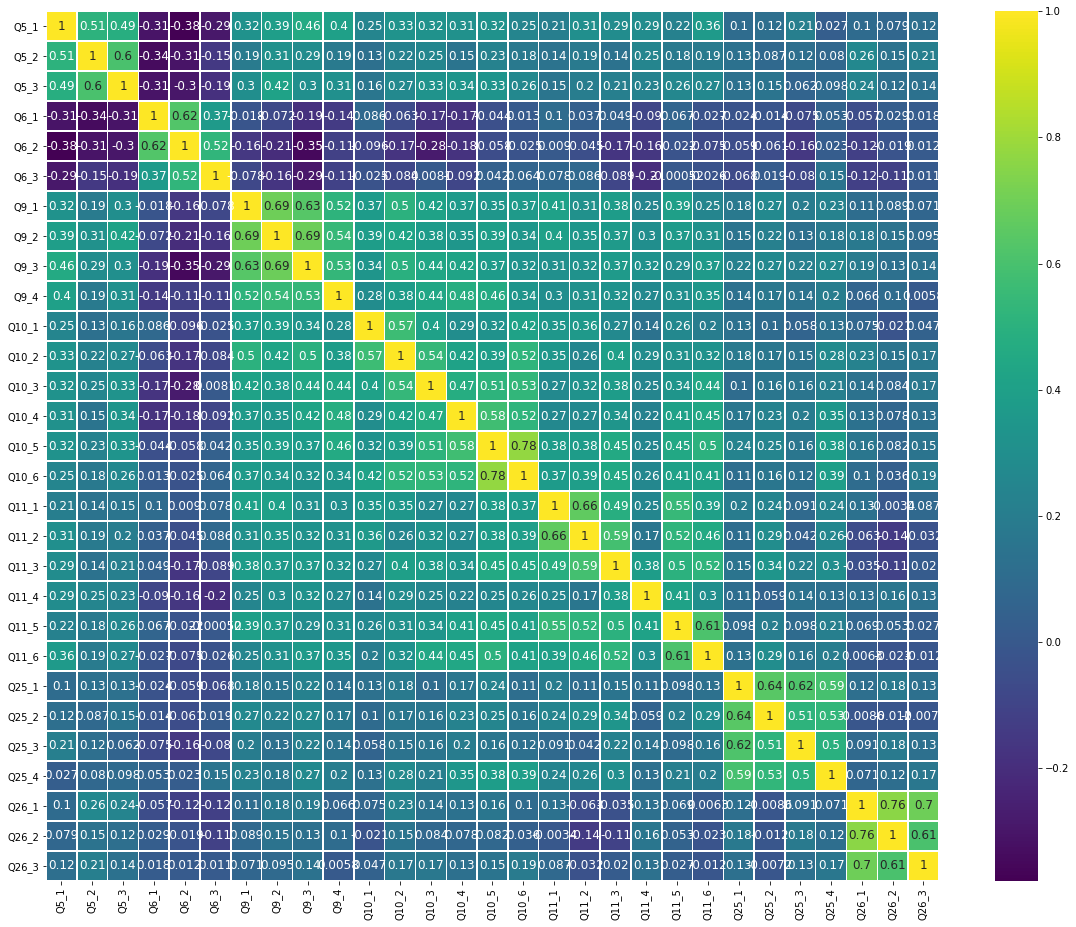

In [20]:
#Построим матрицу корреляция и разукрасим, чтобы не было скучно

fig , ax = plt.subplots(figsize = (20,16))

sns.heatmap(correlation, 
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

Как видно из полученной матрицы, среди переменных, очевидно, существует связь (что в том числе обусловлено преднамеренным формированием анкеты для дальнейшего моделирования), также это характеризует мультиколлинеарность в данных. Теперь почитаем дисперсию и среднеквадратичное отклонение по выборке.

In [21]:
variables = ['Q5_1', 'Q5_2', 'Q5_3', 'Q6_1', 'Q6_2', 'Q6_3', 'Q9_1','Q9_2', 'Q9_3', 'Q9_4', 'Q10_1', 'Q10_2', 'Q10_3', 'Q10_4',
   'Q10_5', 'Q10_6', 'Q11_1', 'Q11_2', 'Q11_3', 'Q11_4', 'Q11_5', 'Q11_6', 'Q25_1', 'Q25_2', 'Q25_3', 'Q25_4', 'Q26_1',
   'Q26_2', 'Q26_3']

df1[variables].agg(['mean', 'std', 'var'])

,Q5_1,Q5_2,Q5_3,Q6_1,Q6_2,Q6_3,Q9_1,Q9_2,Q9_3,Q9_4,Q10_1,Q10_2,Q10_3,Q10_4,Q10_5,Q10_6,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q25_1,Q25_2,Q25_3,Q25_4,Q26_1,Q26_2,Q26_3
mean,2.657895,2.618421,2.815789,3.144737,3.296053,3.802632,3.256579,3.105263,2.822368,2.763158,3.453947,3.348684,3.381579,3.375000,3.769737,3.776316,3.592105,3.677632,3.460526,3.171053,3.697368,3.730263,2.789474,3.526316,2.677632,3.480263,2.657895,2.427632,2.690789
std,1.074110,1.073055,1.147534,1.031991,1.084746,1.092051,0.959420,0.914619,0.892218,1.008158,1.047475,0.978307,1.079209,1.040966,1.012965,0.977884,0.916047,0.873464,0.897986,0.981797,0.928143,0.962684,1.182833,1.178996,1.107482,1.144931,1.061707,1.033236,0.984876
var,1.153712,1.151446,1.316835,1.065005,1.176673,1.192576,0.920486,0.836528,0.796053,1.016382,1.097203,0.957084,1.164692,1.083609,1.026098,0.956257,0.839143,0.762940,0.806379,0.963925,0.861450,0.926760,1.399094,1.390031,1.226516,1.310866,1.127222,1.067576,0.969981


### Спойлер

На следующем этапе исследования планируется проведение факторного анализа и построение факторной модели, это подразумевает построение факторной модели и многое другое.

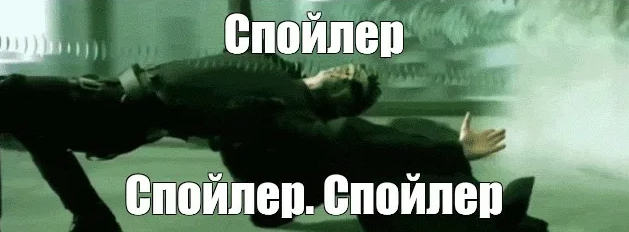

### Приложение

In [22]:
deciph=pd.read_excel('deciph.xlsx') #подгрузим расшифровку переменных

In [36]:
pd.set_option('display.max_rows', None) #сделаем чтобы отображались все строки (нужно для расшифровки переменных)

In [23]:
#так как вопросы длинные, добавим возможность выводить весь текст ячеек чтобы описать переменные
pd.options.display.max_colwidth = 1000 

In [205]:
deciph #выведем приложение с анкетой

,Код,Расшифровка
0,time,Отметка времени
1,Q1,"1. Оцените, насколько активно Вы пользуетесь интернетом (шкала от 1 до 5, где 1 – редко, 5 – часто, 3 – затрудняюсь ответить)."
2,Q2,2. Какое устройство Вы чаще всего используете для доступа в интернет?
3,Q3,3. Для каких целей вы чаще всего используете интернет? Назовите не больше трех целей
4,Q4,"4. Оцените, пожалуйста, насколько Вы доверяете информации (отзывам и оценкам) потребителей о компаниях/брендах/продуктах в интернете (на форумах, в социальных сетях, на сайтах компаний, специализированных порталах и др.)?"
5,Q5_1,"5. Насколько Вы согласны с данными утверждениями о безопасности онлайн-сервисов? [В интернете достаточно гарантий безопасности, чтобы чувствовать себя комфортно при использовании онлайн-сервисов]"
6,Q5_2,5. Насколько Вы согласны с данными утверждениями о безопасности онлайн-сервисов? [Правовые и технологические системы защищают меня от мошенничества при использовании онлайн-сервисов]
7,Q5_3,"5. Насколько Вы согласны с данными утверждениями о безопасности онлайн-сервисов? [Я уверен(-на), что шифрование данных и другие технологии интернета для обеспечения безопасности делают использование онлайн-сервисов безопасными]"
8,Q6_1,6. Согласны ли Вы с данными утверждениями о безопасности ввода данных при использовании онлайн-сервисов? [Введение данных банковских карт в онлайн-сервисах небезопасно]
9,Q6_2,6. Согласны ли Вы с данными утверждениями о безопасности ввода данных при использовании онлайн-сервисов? [Введение персональных данных в онлайн-сервисах небезопасно]


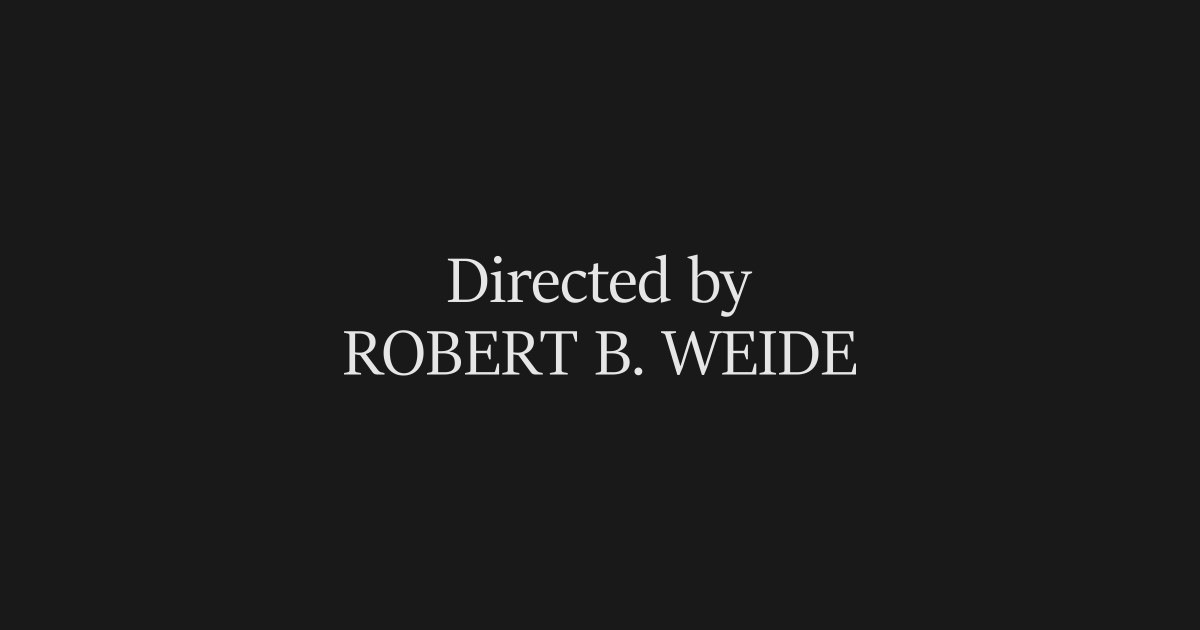